In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# visualisations
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv("ml_data.csv")
df = df.set_index('X')

df

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18
X,,,,,,,,,,,,,,,,,,,,,
Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
A1BG,13.0,18.0,9.0,13.0,14.0,6.0,4.0,6.0,3.0,3.0,...,8.0,3.0,12.0,5.0,16.0,15.0,7.0,5.0,4.0,3.0
A1BG-AS1,7.0,5.0,3.0,3.0,8.0,6.0,8.0,10.0,5.0,2.0,...,3.0,5.0,13.0,9.0,9.0,12.0,2.0,3.0,4.0,1.0
A1CF,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0
A2M,6701.0,6744.0,3251.0,3359.0,2010.0,1926.0,1693.0,1745.0,1656.0,1606.0,...,1886.0,1876.0,2888.0,2876.0,3250.0,3259.0,1456.0,1416.0,2357.0,2357.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,5.0,2.0,1.0,1.0,4.0,4.0,1.0,0.0,8.0,14.0,...,17.0,26.0,1.0,5.0,2.0,0.0,0.0,0.0,2.0,2.0
ZYG11B,437.0,436.0,178.0,158.0,151.0,203.0,320.0,301.0,121.0,134.0,...,235.0,222.0,333.0,405.0,343.0,341.0,153.0,160.0,199.0,217.0
ZYX,1469.0,1382.0,350.0,302.0,343.0,367.0,661.0,629.0,169.0,201.0,...,324.0,330.0,732.0,782.0,1359.0,1393.0,501.0,489.0,512.0,499.0


In [ ]:
df = df.T

In [ ]:
df

X,Y,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
C1,0.0,13.0,7.0,0.0,6701.0,26.0,4.0,5.0,0.0,75.0,...,45.0,9.0,30.0,59.0,226.0,5.0,437.0,1469.0,335.0,382.0
C2,0.0,18.0,5.0,0.0,6744.0,29.0,5.0,2.0,3.0,82.0,...,44.0,4.0,34.0,44.0,237.0,2.0,436.0,1382.0,383.0,425.0
C3,0.0,9.0,3.0,0.0,3251.0,41.0,4.0,0.0,1.0,48.0,...,51.0,25.0,7.0,14.0,101.0,1.0,178.0,350.0,75.0,145.0
C4,0.0,13.0,3.0,0.0,3359.0,31.0,3.0,2.0,0.0,51.0,...,52.0,27.0,15.0,22.0,106.0,1.0,158.0,302.0,82.0,156.0
C5,0.0,14.0,8.0,1.0,2010.0,19.0,5.0,2.0,0.0,212.0,...,67.0,84.0,21.0,22.0,173.0,4.0,151.0,343.0,250.0,280.0
C6,0.0,6.0,6.0,0.0,1926.0,18.0,1.0,2.0,0.0,175.0,...,71.0,74.0,11.0,21.0,187.0,4.0,203.0,367.0,215.0,282.0
C7,0.0,4.0,8.0,2.0,1693.0,16.0,3.0,0.0,0.0,166.0,...,123.0,141.0,15.0,35.0,173.0,1.0,320.0,661.0,205.0,257.0
C8,0.0,6.0,10.0,0.0,1745.0,14.0,2.0,0.0,0.0,162.0,...,116.0,117.0,22.0,32.0,146.0,0.0,301.0,629.0,202.0,265.0
C9,0.0,3.0,5.0,0.0,1656.0,5.0,10.0,1.0,0.0,95.0,...,56.0,81.0,10.0,24.0,112.0,8.0,121.0,169.0,132.0,191.0
C10,0.0,3.0,2.0,1.0,1606.0,5.0,19.0,3.0,2.0,93.0,...,79.0,74.0,17.0,19.0,79.0,14.0,134.0,201.0,103.0,186.0


In [ ]:
X = df.drop(columns=['Y'])


In [ ]:
X

X,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
C1,13.0,7.0,0.0,6701.0,26.0,4.0,5.0,0.0,75.0,1.0,...,45.0,9.0,30.0,59.0,226.0,5.0,437.0,1469.0,335.0,382.0
C2,18.0,5.0,0.0,6744.0,29.0,5.0,2.0,3.0,82.0,0.0,...,44.0,4.0,34.0,44.0,237.0,2.0,436.0,1382.0,383.0,425.0
C3,9.0,3.0,0.0,3251.0,41.0,4.0,0.0,1.0,48.0,0.0,...,51.0,25.0,7.0,14.0,101.0,1.0,178.0,350.0,75.0,145.0
C4,13.0,3.0,0.0,3359.0,31.0,3.0,2.0,0.0,51.0,0.0,...,52.0,27.0,15.0,22.0,106.0,1.0,158.0,302.0,82.0,156.0
C5,14.0,8.0,1.0,2010.0,19.0,5.0,2.0,0.0,212.0,0.0,...,67.0,84.0,21.0,22.0,173.0,4.0,151.0,343.0,250.0,280.0
C6,6.0,6.0,0.0,1926.0,18.0,1.0,2.0,0.0,175.0,0.0,...,71.0,74.0,11.0,21.0,187.0,4.0,203.0,367.0,215.0,282.0
C7,4.0,8.0,2.0,1693.0,16.0,3.0,0.0,0.0,166.0,1.0,...,123.0,141.0,15.0,35.0,173.0,1.0,320.0,661.0,205.0,257.0
C8,6.0,10.0,0.0,1745.0,14.0,2.0,0.0,0.0,162.0,1.0,...,116.0,117.0,22.0,32.0,146.0,0.0,301.0,629.0,202.0,265.0
C9,3.0,5.0,0.0,1656.0,5.0,10.0,1.0,0.0,95.0,0.0,...,56.0,81.0,10.0,24.0,112.0,8.0,121.0,169.0,132.0,191.0
C10,3.0,2.0,1.0,1606.0,5.0,19.0,3.0,2.0,93.0,0.0,...,79.0,74.0,17.0,19.0,79.0,14.0,134.0,201.0,103.0,186.0


In [ ]:
y = df['Y']




In [ ]:
y


,Y
C1,0.0
C2,0.0
C3,0.0
C4,0.0
C5,0.0
C6,0.0
C7,0.0
C8,0.0
C9,0.0
C10,0.0


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
rf = RandomForestRegressor(
    n_estimators=100,
    n_jobs=-1,
    oob_score=True,
    bootstrap=True,
    random_state=42
)


In [ ]:


X_train.fillna(X_train.mean(), inplace=True)


In [ ]:
from sklearn.impute import SimpleImputer


In [ ]:
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Geneid']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [ ]:
rf.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
feature_names = [f"feature_{i + 1}" for i in range(X_train.shape[1])]


In [ ]:
base_imp = imp_df(feature_names, rf.feature_importances_)


NameError: name 'imp_df' is not defined

In [ ]:
base_imp

In [ ]:
df = df.reset_index(drop=True)

feature_names = df.columns
position_numbers = range(len(feature_names))


i = 1
feature_by_position = df.iloc[:, i]


In [ ]:

feature_names_or_positions = [
    f"feature_{i + 1}" if df.columns is None else df.columns[i]
    for i in range(df.shape[1])
]

i = 1
feature_by_position_or_name = feature_names_or_positions[i]
print(f"Feature at position {i}: {feature_by_position_or_name}")


Feature at position 1: A1BG


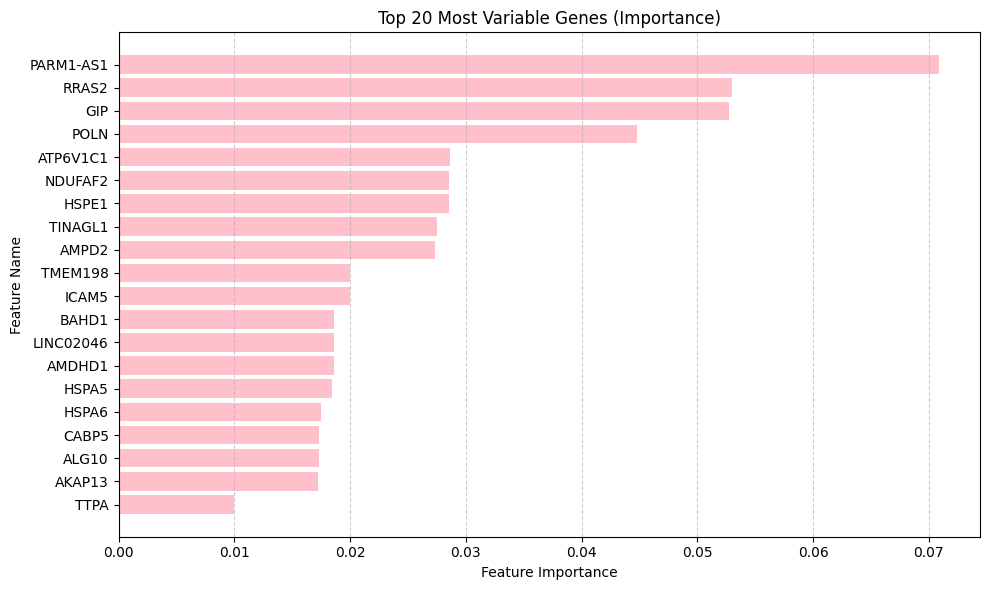

In [ ]:

if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()
else:
    feature_names = [f"feature_{i + 1}" for i in range(X_train.shape[1])]



feature_importances = rf.feature_importances_

gene_names = df.iloc[:, rf.feature_importances_.argsort()[::-1]].columns.tolist()  # Get names in descending order of importance

feature_importance_df = pd.DataFrame({'feature': gene_names, 'importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

top_20_features = feature_importance_df.head(20)['feature'].tolist()

plt.figure(figsize=(10, 6))
plt.barh(top_20_features, feature_importance_df.head(20)['importance'], color = "pink")
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 20 Most Variable Genes (Importance)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import pandas as pd
import numpy as np

y_binned = pd.qcut(y, q=2, labels=[0, 1])
X_train, X_valid, y_train, y_valid = train_test_split(X, y_binned, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_valid = imputer.transform(X_valid)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

acc = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
cm = confusion_matrix(y_valid, y_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Accuracy:", acc)
print("F1 Score:", f1)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

X_full = imputer.fit_transform(X)
cv_scores = cross_val_score(clf, X_full, y_binned, cv=5, scoring='accuracy')
print("5-Fold CV Accuracy:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Geneid']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Geneid']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Accuracy: 1.0
F1 Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Geneid']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


5-Fold CV Accuracy: [0.5        0.71428571 0.42857143 0.71428571 0.71428571]
Mean CV Accuracy: 0.6142857142857143


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_valid)

acc = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
cm = confusion_matrix(y_valid, y_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", acc)
print("F1 Score:", f1)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

X_full = imputer.fit_transform(X)
cv_scores = cross_val_score(best_model, X_full, y_binned, cv=5, scoring='accuracy')
print("5-Fold CV Accuracy:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.875
F1 Score: 0.8888888888888888
Sensitivity: 0.8
Specificity: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Geneid']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


5-Fold CV Accuracy: [0.5        0.71428571 0.42857143 0.71428571 0.71428571]
Mean CV Accuracy: 0.6142857142857143


In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Extract feature importances from the tuned model
feature_importances = best_model.feature_importances_

gene_names = df.drop(columns=['Y']).columns.tolist()

sorted_idx = np.argsort(feature_importances)[::-1]
top_20_idx = sorted_idx[:20]
top_20_features = [gene_names[i] for i in top_20_idx]
top_20_importances = feature_importances[top_20_idx]


<ipython-input-34-97b6f8710aa5>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(top_20_features, fontweight='bold')


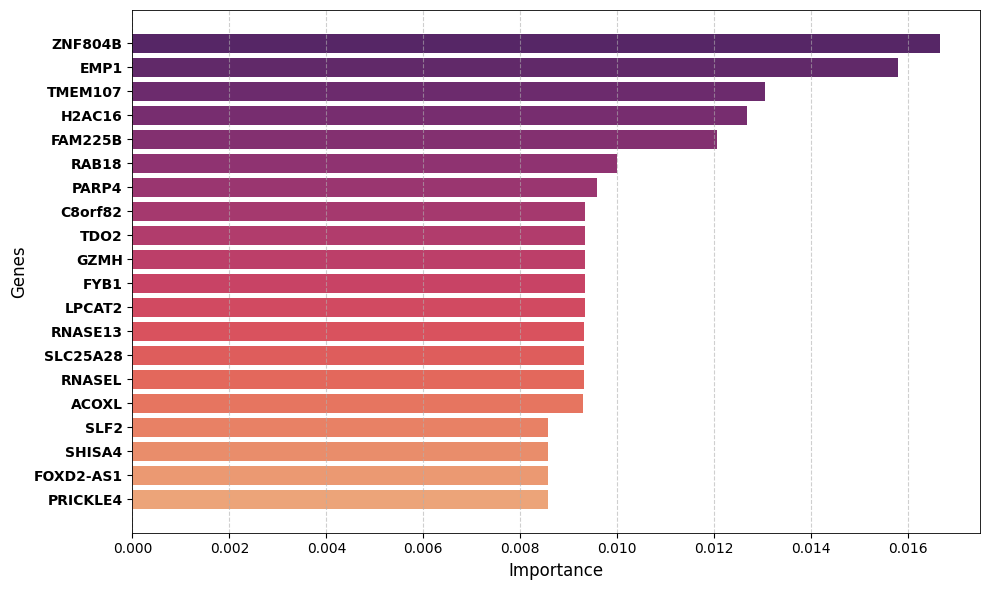

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = sns.color_palette("flare_r", n_colors=len(top_20_features))

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_20_features, top_20_importances, color=colors)
ax.set_xlabel('Importance', fontsize=12)
ax.set_ylabel('Genes', fontsize=12)

ax.invert_yaxis()

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(0.6)


plt.grid(axis='x', linestyle='--', alpha=0.6)  # Only vertical grid lines
plt.grid(axis='y', linestyle=' ', alpha=0.6)  # Only vertical grid lines

ax.set_yticklabels(top_20_features, fontweight='bold')

plt.tight_layout()
plt.show()
